Title: Binary vs. Multi-Class Classification<br>

Task 1:<br>
Binary Classification: Predict if a website visitor will click a button (Click or No Click).<br>
Use a web visitor interaction dataset.<br>
Task: Implement binary classification for click prediction.

Accuracy: 0.65
Confusion Matrix:
[[176  36]
 [ 70  18]]


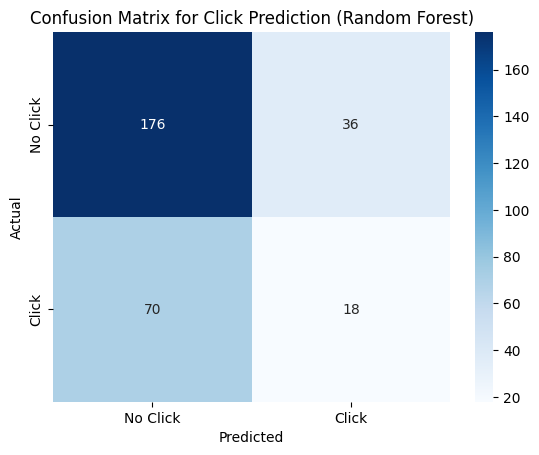

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic web visitor interaction dataset
np.random.seed(42)

# Simulate 1000 website visitors with 4 features
data_size = 1000

# Feature 1: Time spent on the website (in minutes)
feature_1 = np.random.uniform(1, 30, size=data_size)

# Feature 2: Number of pages viewed during the visit
feature_2 = np.random.randint(1, 10, size=data_size)

# Feature 3: Visitor device type (1: mobile, 2: desktop, 3: tablet)
feature_3 = np.random.choice([1, 2, 3], size=data_size)

# Feature 4: Age group of the visitor (1: 18-24, 2: 25-34, 3: 35-44, 4: 45-60, 5: 60+)
feature_4 = np.random.choice([1, 2, 3, 4, 5], size=data_size)

# Target label: 1 for Click, 0 for No Click
labels = np.random.choice([0, 1], size=data_size, p=[0.7, 0.3])  # 30% click rate

# Create a DataFrame
data = pd.DataFrame({
    'time_spent': feature_1,
        'pages_viewed': feature_2,
            'device_type': feature_3,
                'age_group': feature_4,
                    'clicked': labels
                    })
# Split features and target
X = data.drop('clicked', axis=1)
y = data['clicked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
plt.title("Confusion Matrix for Click Prediction (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Task 2:<br>
Multi-Class Classification: Recognize handwritten digits (0-9).<br>
Use the MNIST dataset.<br>
Task: Develop a model that correctly classifies each handwritten digit.<br>


Accuracy: 0.98
Confusion Matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


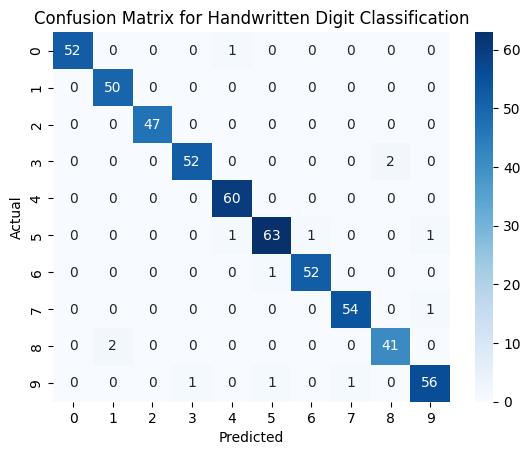

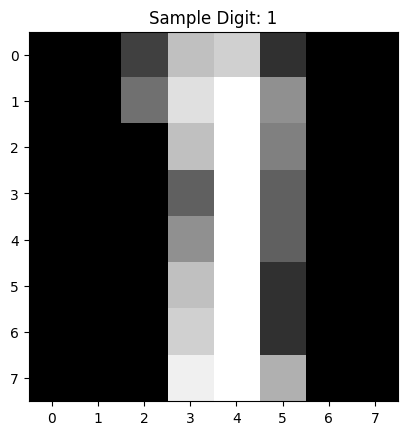

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the MNIST dataset
digits = datasets.load_digits()

# Features and target
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix for Handwritten Digit Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optionally: Show a sample digit from the test set
sample_index = 10
plt.imshow(X_test[sample_index].reshape(8, 8), cmap='gray')
plt.title(f"Sample Digit: {y_test[sample_index]}")
plt.show()


Task 3:<br>
Multi-Class Classification: Classify a flower species based on petal and sepal measurements.<br>
Use the Iris dataset.<br>
Task: Use features to classify into three species: Setosa, Versicolor, or Virginica.


Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


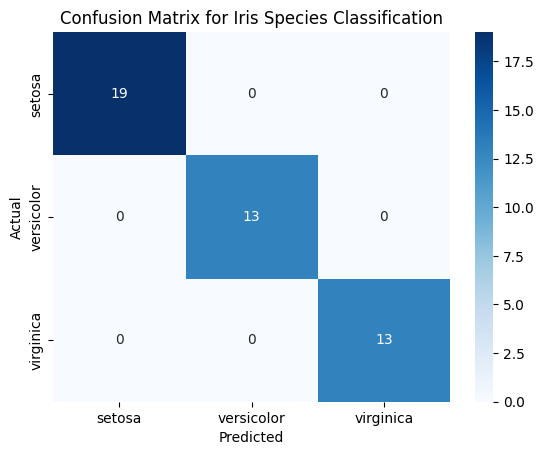

Sample Flower Data: [5.4 3.4 1.5 0.4]
Predicted Species: setosa, Actual Species: setosa


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()

# Features and target
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for Iris Species Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optionally: Show a sample flower data from the test set
sample_index = 5
sample_data = X_test[sample_index]
sample_species = iris.target_names[y_test[sample_index]]
print(f"Sample Flower Data: {sample_data}")
print(f"Predicted Species: {iris.target_names[y_pred[sample_index]]}, Actual Species: {sample_species}")
